<h1 align="center"><font color=#0000C2>NFL Big Data Bowl 2025</font></h1>
<h2 align="center"> <font color=#800000>Receiver Route Predictor: Modeling</font></h2>

In [71]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('preliminary_data.csv')

In [3]:
data.head()

,Unnamed: 0,playId,week,wasRunningRoute,routeRan,position,nflId,quarter,down,yardsToGo,offenseFormation,receiverAlignment,defensiveTeam,possessionTeam,distanceToCenter_x,distanceToCenter_y,yardsToEndzone,scoreDifferential,timeInHalf,timeInGame
0,4,56,1,1.0,IN,WR,42489,1,1,10,SHOTGUN,2x2,LA,BUF,0.67,-13.98,75,0,1800,3600
1,8,56,1,1.0,OUT,WR,44985,1,1,10,SHOTGUN,2x2,LA,BUF,0.69,11.47,75,0,1800,3600
2,14,56,1,1.0,IN,TE,47879,1,1,10,SHOTGUN,2x2,LA,BUF,0.63,-4.70,75,0,1800,3600
3,18,56,1,1.0,GO,WR,52536,1,1,10,SHOTGUN,2x2,LA,BUF,0.11,21.42,75,0,1800,3600
4,136,122,1,1.0,GO,WR,42489,1,2,3,SHOTGUN,2x1,LA,BUF,0.22,-8.31,55,0,1695,3495


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40848 entries, 0 to 40847
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          40848 non-null  int64  
 1   playId              40848 non-null  int64  
 2   week                40848 non-null  int64  
 3   wasRunningRoute     40848 non-null  float64
 4   routeRan            40848 non-null  object 
 5   position            40848 non-null  object 
 6   nflId               40848 non-null  int64  
 7   quarter             40848 non-null  int64  
 8   down                40848 non-null  int64  
 9   yardsToGo           40848 non-null  int64  
 10  offenseFormation    40848 non-null  object 
 11  receiverAlignment   40848 non-null  object 
 12  defensiveTeam       40848 non-null  object 
 13  possessionTeam      40848 non-null  object 
 14  distanceToCenter_x  40848 non-null  float64
 15  distanceToCenter_y  40848 non-null  float64
 16  yard

Importance of the variables:

routeRan: Category being predicted, contains 12 possible routes

position: Certain routes may only be run by wide receivers, generally go routes. Patterns like this would occur for running backs and tight ends as well

down and yards to go: On third down and long, a team needs to get the first down, and may be more likely to run mid range routes or screens. On second and short, a team may be likely to go for a deep shot.

offense formation: depending on the formation, there may or may not be a running back, and that can change how long the quarterback has to throw, and how many receivers will be lined up

receiverAlignment: different plays may occur with different receiver alignments, similar to offense formation

distance to Center X and Y: If someone is far, they may be more likely to run a go or post, and if they are close, crossing routes and slants may be more likely. If they are positioned further back from the center, a screen may be more likely

yards to endzone, time left, and score differential: These all determine the flow of the game. If there is short time and a team is down two scores, they may need to go for a bunch of longer routes to try to score as fast as possible.

Feature Importance Charts:

In [6]:
toEncode = data[['position', 'down', 'yardsToGo', 'offenseFormation', 'receiverAlignment', 'distanceToCenter_x', 'distanceToCenter_y', 'yardsToEndzone','scoreDifferential','timeInHalf','timeInGame','routeRan']]
X = toEncode.drop('routeRan', axis=1)
y = toEncode['routeRan']

X = pd.get_dummies(X, columns=['position', 'offenseFormation', 'receiverAlignment','down'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LogisticRegression(max_iter = 15000, multi_class = 'multinomial')

In [9]:
LR = model.fit(X_train, y_train)

In [10]:
confusion_matrix(y_test, LR.predict(X_test))

array([[   8,    0,    0,  319,    0,    0,    0,    1,    0,    0,    0,
           0],
       [   0,    0,   58,   17,  223,   75,    0,    4,    0,    0,    0,
           0],
       [   0,    0,  197,  106,  376,  154,    0,   22,    0,    0,    0,
           0],
       [  13,    0,   79,  872,  122,   74,    0,   19,    0,    1,    0,
           0],
       [   0,    0,   87,   99, 1058,  173,    0,   25,    0,    0,    0,
           0],
       [   0,    0,   67,  109,  748,  209,    0,   13,    0,    0,    0,
           0],
       [   0,    0,   39,   29,  448,  103,    0,    7,    0,    0,    0,
           0],
       [   0,    0,   57,  214,  424,  128,    0,   15,    0,    0,    0,
           0],
       [   0,    0,   44,    6,  390,   88,    0,    4,    0,    1,    0,
           0],
       [   1,    0,   34,  137,  125,   30,    0,   11,    0,    0,    0,
           0],
       [   0,    0,   28,   35,  330,   68,    0,    5,    0,    0,    0,
           0],
       [   1,    0,  

In [11]:
print(classification_report(y_test, LR.predict(X_test)))

              precision    recall  f1-score   support

       ANGLE       0.35      0.02      0.05       328
      CORNER       0.00      0.00      0.00       377
       CROSS       0.29      0.23      0.26       855
        FLAT       0.44      0.74      0.55      1180
          GO       0.25      0.73      0.37      1442
       HITCH       0.19      0.18      0.19      1146
          IN       0.00      0.00      0.00       626
         OUT       0.12      0.02      0.03       838
        POST       0.00      0.00      0.00       533
      SCREEN       0.00      0.00      0.00       338
       SLANT       0.00      0.00      0.00       466
       WHEEL       0.00      0.00      0.00        41

    accuracy                           0.29      8170
   macro avg       0.14      0.16      0.12      8170
weighted avg       0.19      0.29      0.20      8170



C:\Users\14103\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14103\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14103\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
rf = RandomForestClassifier()

In [68]:
RF = rf.fit(X_train,y_train)

In [69]:
confusion_matrix(y_test, RF.predict(X_test))

array([[ 39,   0,   0, ...,   0,   0,   0],
       [  0,  12,  73, ...,   2,   2,   0],
       [  0,  33, 282, ...,   7,   8,   0],
       ...,
       [  5,   8,  35, ...,  26,   1,   1],
       [  0,   6,  35, ...,   6,  23,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [15]:
# Classification report shows how many routes were run in each category - there were a few outliers above 1000 and one 41
print(classification_report(y_test, RF.predict(X_test)))

              precision    recall  f1-score   support

       ANGLE       0.31      0.12      0.17       328
      CORNER       0.10      0.04      0.06       377
       CROSS       0.30      0.31      0.31       855
        FLAT       0.48      0.70      0.57      1180
          GO       0.31      0.53      0.39      1442
       HITCH       0.21      0.29      0.24      1146
          IN       0.07      0.03      0.04       626
         OUT       0.19      0.11      0.14       838
        POST       0.09      0.04      0.06       533
      SCREEN       0.30      0.08      0.13       338
       SLANT       0.20      0.06      0.09       466
       WHEEL       0.00      0.00      0.00        41

    accuracy                           0.30      8170
   macro avg       0.21      0.19      0.18      8170
weighted avg       0.26      0.30      0.26      8170



From the Multinomial Logistic Regression confusion matrix, we see some interesting points. The first is that the model basically always predicted one of the 4 most common routes. Interestingly, this still provided an accuracy of 29%. The regression model had 0% precision and recall for half of the routes.

For the Random Forest, the accuracy is 30%, which is only marginally higher, but the model does a better job of predicting a wide range of routes. With Hyper parameter tuning as shown below, the model reaches slightly over 32% accuracy.

While roughly 30% is not a very accurate model, when comparing to the best baseline model (most common route is predicted every time), the baseline model had an accuracy of around 18% (1442 GO/8170 Total). Both the Regression model and the random forest outperformed the baseline model by a wide margin, which shows promise for the usefulness of the model

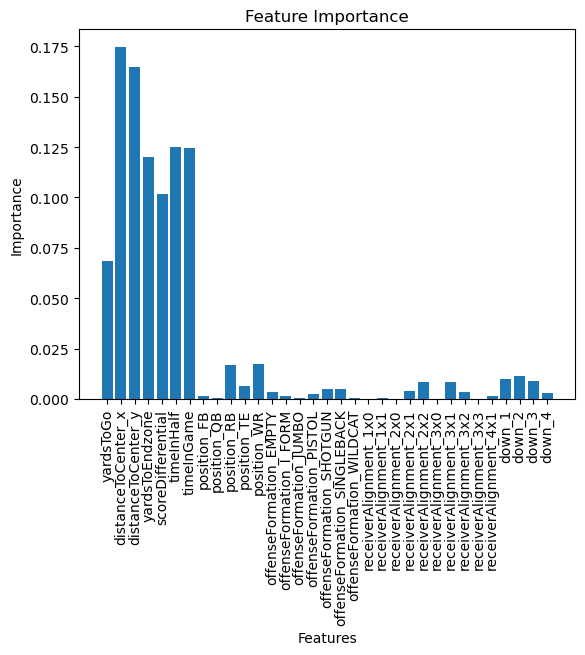

In [72]:
# Show feature importances in the random forest model
importances = RF.feature_importances_

# Create a bar chart
plt.bar(range(len(importances)), importances, align='center')
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

As stated above, there are certain variables that are more related to the flow of the game. On average, these were the most important variables - distance to endzone, score differential, time in game, time in half, and yards to first down. However, the most important variables were the relative position to the snapper before the play. Factors such as position, formation, alignment, and down had very little impact on the model.

I can understand that down is a less important factor than time in the game and yards to go, as the down wouldn't exactly show desperation like the other ones would. 

Receiver alignment is another interesting one, but in hindsight it makes sense that it is simply a less defining version of distance to center. Instead of the actual distance to the center, it simply shows how many receivers there are and where they are lining up. This would be important for determining plays, but the actual location matters much more.

Offense formation is of low importance because this model is only looking at the routes run. I think offense formation and receiver alignment would both be useful in determining what play is being run, or whether there is a run vs a pass, but both of these are outside the scope of this project.

In [16]:
columns = ['ANGLE','CORNER','CROSS','FLAT','GO','HITCH','IN','OUT','POST','SCREEN','SLANT','WHEEL']

In [35]:
print(model.classes_)

['ANGLE' 'CORNER' 'CROSS' ... 'SCREEN' 'SLANT' 'WHEEL']


In [17]:
# Hyper Parameter Tuning
params = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(rf, param_distributions = params, n_iter=10, cv=5)

RF = random_search.fit(X_train,y_train)

In [18]:
confusion_matrix(y_test, RF.predict(X_test))
print(classification_report(y_test, RF.predict(X_test)))
RF_accuracy = accuracy_score(y_test, RF.predict(X_test))
print(f"Random Forest Accuracy: {RF_accuracy}")
best_rf = random_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  random_search.best_params_)

C:\Users\14103\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14103\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14103\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       ANGLE       0.50      0.02      0.05       328
      CORNER       0.20      0.01      0.02       377
       CROSS       0.33      0.35      0.34       855
        FLAT       0.48      0.77      0.59      1180
          GO       0.30      0.68      0.42      1442
       HITCH       0.21      0.35      0.26      1146
          IN       0.11      0.01      0.01       626
         OUT       0.20      0.03      0.06       838
        POST       0.27      0.01      0.01       533
      SCREEN       0.45      0.06      0.10       338
       SLANT       0.36      0.01      0.02       466
       WHEEL       0.00      0.00      0.00        41

    accuracy                           0.32      8170
   macro avg       0.29      0.19      0.16      8170
weighted avg       0.30      0.32      0.25      8170

Random Forest Accuracy: 0.3247246022031824
Best hyperparameters: {'max_depth': 15, 'n_estimators': 402}


Final Accuracies:

In [62]:
RF_accuracy = accuracy_score(y_test, RF.predict(X_test))
LR_accuracy = accuracy_score(y_test, LR.predict(X_test))

print(f"Random Forest Accuracy: {RF_accuracy}")
print(f"Logistic Regression Accuracy: {LR_accuracy}")

Random Forest Accuracy: 0.3247246022031824
Logistic Regression Accuracy: 0.28873929008567933


With the final model accuracies sitting around 28.9% and 32.5%, we look to next steps. Ideally, this model can be used with computer vision to understand immediately distances from the snap, what yard line the team is on, and the formation of the offense. On top of this, the model would be tracking the scores of the game and so each play as the team is lined up the coaching staff would have the model open, and a percentage odds for the most likely route would show.

To improve accuracy, I think further hyperparameter tuning could be done, as well as attempting new modeling techniques such as neural networks, which could more deeply understand the patterns and relationships between plays.

This project was a fun one, and my first personal data science project. Before I started, I was looking into doing an NFL project, and then an advisor in my program mentioned this competition days later, a couple of weeks before the competition end date. I look forward to competing next year as well!